<a href="https://colab.research.google.com/github/huong89/Coursework-template/blob/master/Iraq_project_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import numpy as np

In [ ]:
# Function to calculate the percentage of each response for a question
def calculate_percentage(df, question):
    response_counts = df[question].value_counts()
    response_percentages = response_counts / response_counts.sum() * 100
    return response_percentages

# Function to create a gradient scale based on a base color
def create_gradient(base_color_hex, num_shades):
    base_color_rgb = matplotlib.colors.hex2color(base_color_hex)
    return [matplotlib.colors.to_hex([(base_color_rgb[j] + (1 - base_color_rgb[j]) * (i / num_shades)) for j in range(3)]) for i in range(num_shades)]


In [ ]:

# Load the Excel file
file_path = '/content/drive/MyDrive/GSF/Iraq survey project evaluation.xlsx'

# Read the sheets into pandas dataframes
xlsx = pd.ExcelFile(file_path)

# Get the names of the sheets
sheet_names = xlsx.sheet_names
sheet_names


['Closed questions ', 'Open questions', 'Roundtable outcomes ']

In [ ]:
# Read the first sheet "Closed questions"
closed_questions_df = pd.read_excel(xlsx, sheet_name=sheet_names[0])

# Display the first few rows to understand the data structure
closed_questions_df.head()


,Number,Type of participant,The participation of survivors/co-creation?,The functioning of the Steering Committee?,The capacities of [implementing organisations]?,The identification process?,For survivors: the different IRM you received?,Financial IRM provided?,Training provided alongside financial IRM?,Psychological IRM provided?,Medical IRM provided?,Collective IRM?,The accompaniment provided to survivors?,The overall outcomes of the project?,How risks have been managed?,How the exit strategy/ transitional period is being handled?,"""The project has had a positive impact on the wider community.""","""The project has had a positive impact on survivors’ families."""
0,1,Survivor,Very satisfied,Very satisfied,Somewhat satisfied,Neither satisfied nor satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Agree,Neither agree nor disagree
1,2,Survivor,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Neither satisfied nor dissatisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Very satisfied,Neither satisfied nor dissatisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Strongly agree,Strongly agree
2,3,Survivor,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Agree,Agree
3,4,Survivor,Very satisfied,Very satisfied,Very satisfied,Neither satisfied nor satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Agree,Neither agree nor disagree
4,5,Survivor,Somewhat satisfied,Neither satisfied nor dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Neither satisfied nor dissatisfied,Very satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Neither agree nor disagree,Strongly agree


In [ ]:
closed_questions_df = closed_questions_df[closed_questions_df['Number'] != 14].drop('Number', axis=1)

closed_questions_df.replace({
    'Sowhat satisfied': 'Somewhat satisfied',
    'Neither satisfied nor satisfied': 'Neither satisfied nor dissatisfied'
}, inplace=True)

closed_questions_df.head()

,Type of participant,The participation of survivors/co-creation?,The functioning of the Steering Committee?,The capacities of [implementing organisations]?,The identification process?,For survivors: the different IRM you received?,Financial IRM provided?,Training provided alongside financial IRM?,Psychological IRM provided?,Medical IRM provided?,Collective IRM?,The accompaniment provided to survivors?,The overall outcomes of the project?,How risks have been managed?,How the exit strategy/ transitional period is being handled?,"""The project has had a positive impact on the wider community.""","""The project has had a positive impact on survivors’ families."""
0,Survivor,Very satisfied,Very satisfied,Somewhat satisfied,Neither satisfied nor dissatisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Agree,Neither agree nor disagree
1,Survivor,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Neither satisfied nor dissatisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Very satisfied,Neither satisfied nor dissatisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Strongly agree,Strongly agree
2,Survivor,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Agree,Agree
3,Survivor,Very satisfied,Very satisfied,Very satisfied,Neither satisfied nor dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Agree,Neither agree nor disagree
4,Survivor,Somewhat satisfied,Neither satisfied nor dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Neither satisfied nor dissatisfied,Very satisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Very satisfied,Somewhat satisfied,Very satisfied,Very satisfied,Neither agree nor disagree,Strongly agree


In [ ]:
# Separate responses into two categories
agree_disagree_responses = ['Strongly agree', 'Agree', 'Neither agree nor disagree', 'Disagree']
satisfied_dissatisfied_responses = ['Very satisfied', 'Somewhat satisfied', 'Neither satisfied nor dissatisfied',
                                    'Somewhat dissatisfied', 'Very dissatisfied']

In [ ]:
# Calculate percentages for each question
percentage_data = {}
for question in closed_questions_df.columns[1:]:
    percentage_data[question] = calculate_percentage(closed_questions_df, question)

In [ ]:
# Convert to DataFrame, fill missing values, and reorder by 'Strongly Agree'/'Very Satisfied'
percentage_df = pd.DataFrame(percentage_data).fillna(0).transpose()
percentage_df = percentage_df.sort_values(by=['Strongly agree', 'Very satisfied'], ascending=False)

In [ ]:
# Create gradient colors
gradient_agree_disagree = create_gradient('#FACD10', len(agree_disagree_responses))
gradient_satisfied_dissatisfied = create_gradient('#653C98', len(satisfied_dissatisfied_responses))

In [ ]:
# Assign gradient colors to each response type
colors_agree_disagree_gradient = dict(zip(agree_disagree_responses, gradient_agree_disagree))
colors_satisfied_dissatisfied_gradient = dict(zip(satisfied_dissatisfied_responses, gradient_satisfied_dissatisfied))

In [ ]:
# Combine color mappings
color_map_gradient = {**colors_agree_disagree_gradient, **colors_satisfied_dissatisfied_gradient}

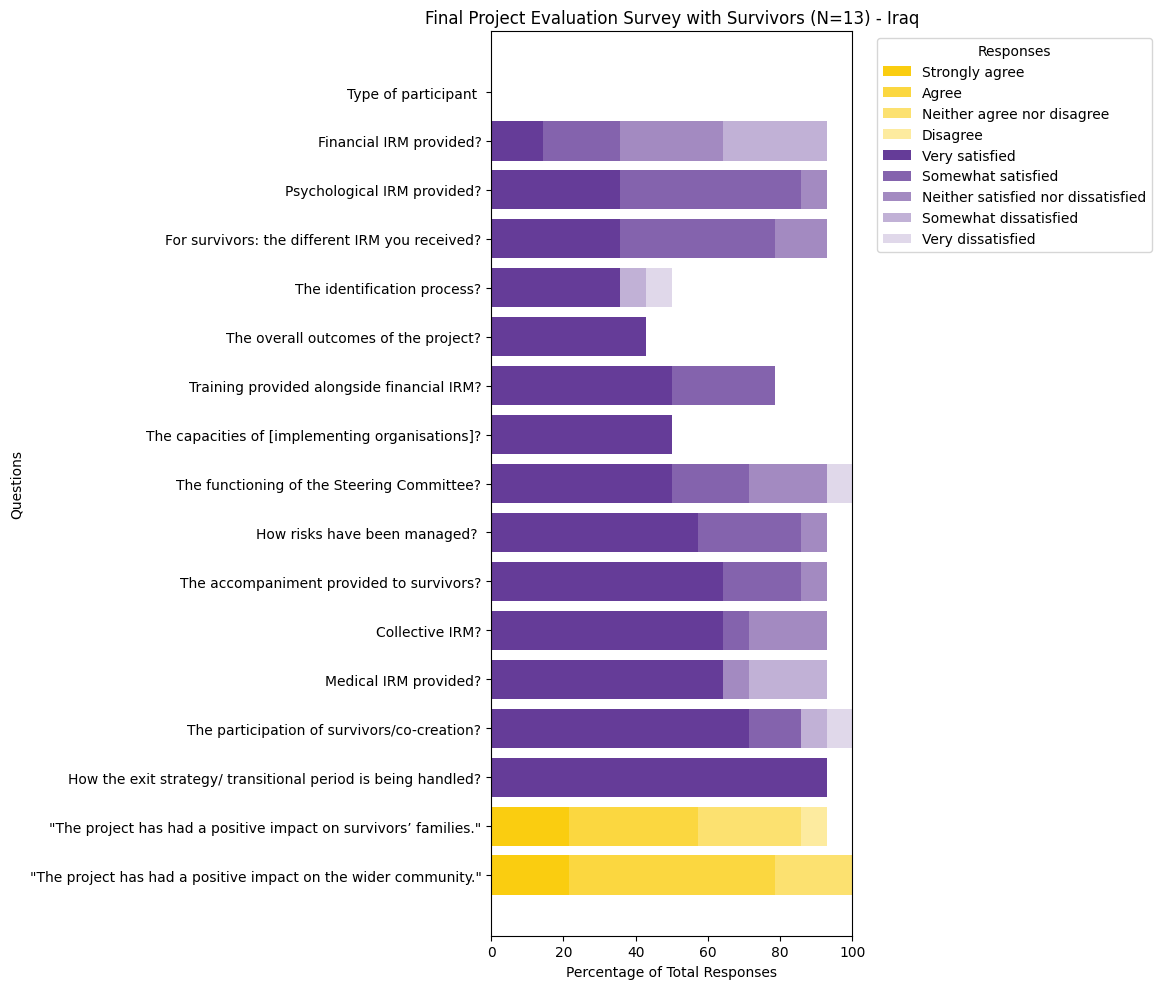

In [ ]:
# Plotting the final chart
plt.figure(figsize=(12, 10))
bottom = np.zeros(len(percentage_df))
new_ordered_responses = agree_disagree_responses + satisfied_dissatisfied_responses

for response in new_ordered_responses:
    color = color_map_gradient[response]
    plt.barh(percentage_df.index, percentage_df[response], left=bottom, color=color, label=response)
    bottom += percentage_df[response].values

plt.title('Final Project Evaluation Survey with Survivors (N=13) - Iraq')
plt.xlabel('Percentage of Total Responses')
plt.ylabel('Questions')
plt.legend(title='Responses', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()